In [0]:
#import data

# Dataset URL: https://www.kaggle.com/c/titanic/data
# I don't calim the ownership of data and it is originally posted on the above URL
# This Lab is only for Education purpose and dosen't claim the Dataset rights.
# Data was hosted on custom server as many users are beginners and might not be able to use kaggle.com .
# If you know how to use kaggle please don't use this colab.
# After 27/03/2020 we will delete the Data from our server.

In [0]:
import pandas as pd
from matplotlib.pyplot import *
dataset=pd.read_csv("http://iali.in/datasets/titanic/train.csv")

In [0]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [111]:
print("Extracted Honorifics as feature from Name:")
print(dataset['Title'].value_counts())

Extracted Honorifics as feature from Name:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Jonkheer      1
Mme           1
Lady          1
Capt          1
Ms            1
Countess      1
Don           1
Name: Title, dtype: int64


In [0]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
dataset['Title'] = dataset['Title'].map(title_mapping)

In [0]:
def bar_chart(feature,title,xlabel,ylabel,legend):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    bar = df.plot(kind='barh',stacked=True,figsize=(15,5),fontsize=12)
    bar.set_title(title,fontsize = 24)
    bar.set_xlabel(xlabel,fontsize=18)
    bar.set_ylabel(ylabel,fontsize=18)
    bar.legend(legend,fontsize=15)

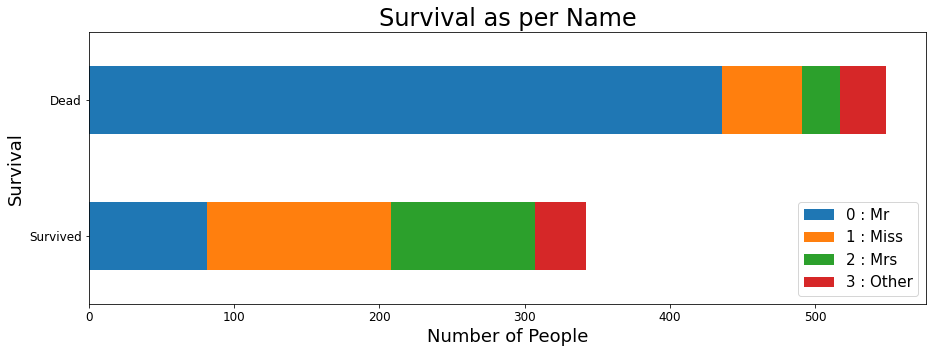

In [114]:
leg=[]
i = 0
for key,value in title_mapping.items():
  if i==3:
    break
  temp = str(value)+" : "+key
  leg.append(temp)
  i+=1
leg.append("3 : Other")
bar_chart('Title',"Survival as per Name","Number of People","Survival",leg)

In [0]:
# delete unnecessary feature from dataset
dataset.drop('Name', axis=1, inplace=True)

In [0]:
sex_mapping = {"male": 0, "female": 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

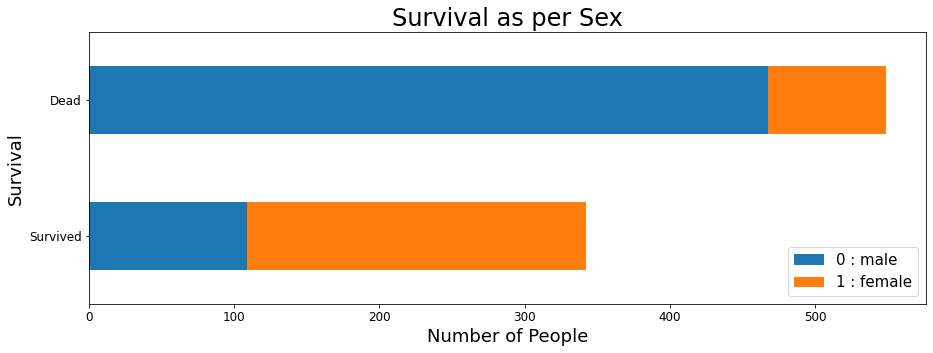

In [117]:
leg=[]
for key,value in sex_mapping.items():
  temp = str(value)+" : "+key
  leg.append(temp)
bar_chart('Sex',"Survival as per Sex","Number of People","Survival",leg)

In [118]:
print("Data Cleaning: Before Filling missing values for Age --> count = 714 out of 891")
print()
dataset.info()
print()
print()
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)
print("Data Cleaning: After Filling missing values for Age --> count = 891 out of 891")
print()
dataset.info()

Data Cleaning: Before Filling missing values for Age --> count = 714 out of 891

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


Data Cleaning: After Filling missing values for Age --> count = 891 out of 891

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age          

In [0]:
dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

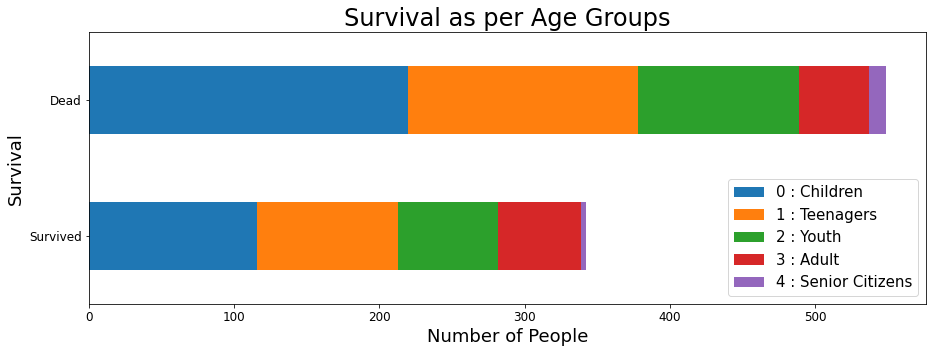

In [120]:
leg=["0 : Children","1 : Teenagers","2 : Youth","3 : Adult","4 : Senior Citizens"]
bar_chart('Age',"Survival as per Age Groups","Number of People","Survival",leg)

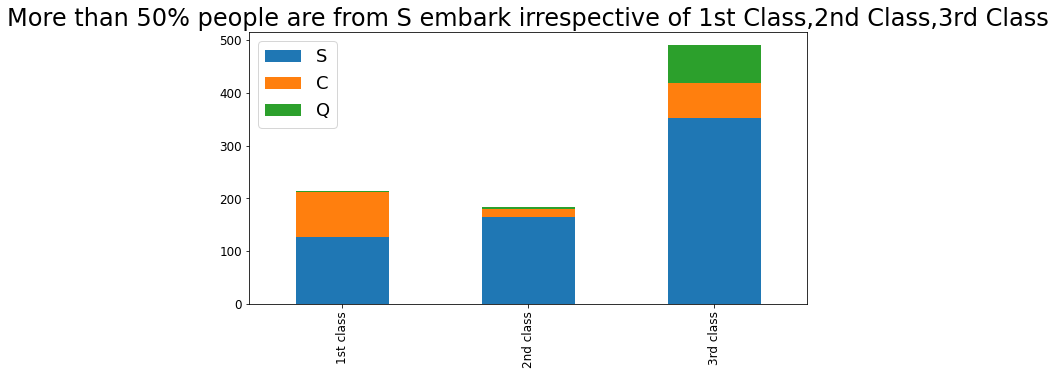

In [121]:
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
bar = df.plot(kind='bar',stacked=True, figsize=(10,5),fontsize=12)
bar.set_title("More than 50% people are from S embark irrespective of 1st Class,2nd Class,3rd Class",fontsize = 24)
bar.legend(fontsize=18)

In [123]:
print("Data Cleaning: Before Filling missing values for Embark --> count = 889 out of 891")
dataset.info()
print()
print()
print("Filling out missing embark with S embark")
dataset['Embarked'] = dataset['Embarked'].fillna('S')
print("Data Cleaning: After Filling missing values for Embark --> count = 891 out of 891")
dataset.info()


Data Cleaning: Before Filling missing values for Embark --> count = 889 out of 891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


Filling out missing embark with S embark
Data Cleaning: After Filling missing values for Embark --> count = 891 out of 891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Se

In [124]:
print("Categorical Data: Mapping embarks S,C,Q to 0,1,2")
print()

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
print(dataset.sample(5))

Categorical Data: Mapping embarks S,C,Q to 0,1,2

     PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
161          162         1       2    1  ...  15.7500    NaN         0     2
519          520         0       3    0  ...   7.8958    NaN         0     0
697          698         1       3    1  ...   7.7333    NaN         2     1
470          471         0       3    0  ...   7.2500    NaN         0     0
209          210         1       1    0  ...  31.0000    A31         1     0

[5 rows x 12 columns]
